# Business understanding

## 1.1 Introduction

The following project analyzes the housing sales of King county. It will try to compare how prices are influenced by different features e.g., bathrooms, bedrooms and such. This features will be tested side by side with the price to see their proportion against each other i.e does the increase in feature A lead to increase/decrease in the price. Does it even have an effect to start with. This will enable us to give the stakeholder the visuals and the recommendations to enable him or her to make the necessary conclusions. 

## 1.2 Problem Statement

The problem statement is to give the stakeholders real estate data which will enable them know where to invest, how to renovate based upon previous patterns which have already occured in the northwestern county real estate business. There is need to identify the trends there in the past and their consequences e.g when the house was put up in front of a water body(waterfront), how fast did it find a customer. Does putting it in front of a waterfront have any positive impact?

## 1.3 Main Objective

The main objective is to select the features which influence the price of a house mostly and then visualize them and put them on a regression scale based on the past data to construct a predictive model to identify how in the future, what will be influencing the real estate business.

## 1.4 Specific Objectives

1.4.1. To identify the most correlated features with the price to create a multilinear regreesion to help us in knowing how the features influence the prices and even influence the customers. </br>
1.4.2 To build a baseline model to identify the most relevant data to be used as the starting point of the analysis. </br>
1.4.3 To use the linear regression metrics to have the appopriate coefficients which will enable us to come up with the relevant recommendations for the stakeholders of the real estates 

## 1.5 Notebook Structure

### 1.5.1 Introduction </br>
### 1.5.2 Problem Statement </br>
### 1.5.3 Main Objective </br>
### 1.5.4 Specific Objectives </br>
### 1.5.5 Importing Libraries </br>
### 1.5.6 Data Understanding </br>
### 1.5.7 Data Cleaning </br>
### 1.5.8 Modelling </br>
### 1.5.9 Regression Results </br>
### 1.5.10 Data Visualizations </br>
### 1.5.11 Interpretations</br>
### 1.5.12  Recommendations and Conclusions

## 2. Importing Libraries and filtering warnings

In [2]:
#import the relevant libraries
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# 3. Data Understanding

## 3.1 Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [3]:
# Opening the csv file
data = pd.read_csv("Data/kc_house_data.csv")

# Viewing both the head and the tail of the data
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
# Checking data in tabular form
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Viewing the shape of the data
data.shape

(21597, 21)

In [6]:
# viewing data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<Axes: ylabel='Density'>

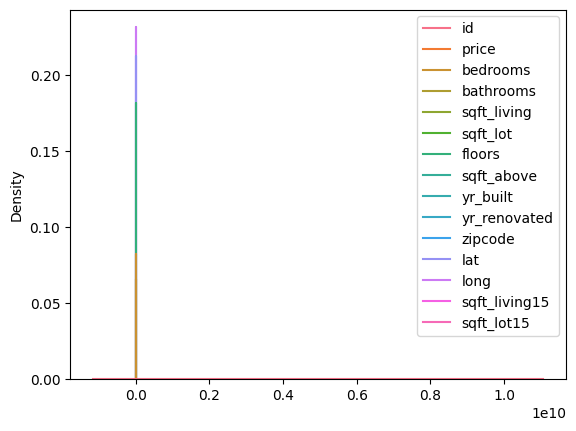

In [7]:
# Let's see how it looks visually
sns.kdeplot(data)

We will compare and contrast this density plot before cleaning and after cleaning later on. </br>
For now, let's clean

# 4. Data cleaning

## 4.1 Missing Values

Let's check for any missing data

In [8]:
data.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Checking for missing values
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


Waterfront and yr_renovated have missing values. Let's see what type of missing values they have to decide how we are going to handle the situation.

In [9]:
data["waterfront"].value_counts(dropna = False)

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64

In [10]:
data["yr_renovated"].value_counts(dropna = False)

0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

For the waterfront, let's fill the missing values with unknown i.e a house may have a waterfront (yes), or not (no), or in this case, we don't know

In [11]:
data["waterfront"].fillna("Unknown", inplace = True)
data["waterfront"]

0        Unknown
1             NO
2             NO
3             NO
4             NO
          ...   
21592         NO
21593         NO
21594         NO
21595    Unknown
21596         NO
Name: waterfront, Length: 21597, dtype: object

Now we tackle yr_renovated to see how we will tackle the missing values

In [12]:
data["yr_renovated"].value_counts(dropna = False)

0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [13]:
data["yr_renovated"].value_counts(dropna = False).sum()

21597

We can not do the same for the missing values for the column of yr_renovated. This is because the missing values take up a whooping 96.5551% of the entire column. The best way to deal with them is to drop the entire column.

In [14]:
data["yr_renovated"].value_counts(dropna = False)

0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [15]:
# Drop the column
data.drop("yr_renovated", axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,Unknown,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


## 4.2 Checking for placeholders

In [16]:
data["sqft_basement"].value_counts(dropna = False)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [17]:
data["sqft_basement"].replace("?", 0, inplace = True)

## 4.3 Duplicates

In [18]:
data.duplicated().any()

False

There are no duplicates in our data

## 4.4 Removing outliers

### Filter data for yr_built 
Having houses built before 1950 will not make much sense. This is because mortgages at this time were changing with the end of world war two and have been rising quite steadly ever since

In [19]:
# filter data above 2000
data = data[data["yr_built"] > 1950]

## 4.5 Removing irrelevant columns

There are some columns which really don't count. They have very minimal to no effect at all on the final data. E.g date. </br>
Also zipcode. No one stays in a given location because of what the zipcode is </br>
Id doesn't matter here because; 
1. It doesn't influence the price of a house.
2. There are no duplicates

In [20]:
# Dropping date, zipcode, id
columns_to_drop = data[["zipcode", "id", "date"]]
for column in columns_to_drop:
    data = data.drop(column, axis = 1)

## 4.6 Fixing messy columns

In [21]:
print(data["grade"].unique())

['7 Average' '8 Good' '11 Excellent' '9 Better' '6 Low Average'
 '10 Very Good' '12 Luxury' '4 Low' '5 Fair' '13 Mansion']


In [22]:
data["grade"] = data["grade"].str.split(n = 1).str[0]

data["grade"] = pd.to_numeric(data["grade"])
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,Average,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11,3890,1530.0,2001,0.0,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,Unknown,NONE,Average,8,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


## 4.7 Converting categorical data into numeric to enable the measuring of coefficients

In [23]:
data["waterfront"].unique()

array(['Unknown', 'NO', 'YES'], dtype=object)

In [24]:
data["view"].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [25]:
# Converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

numerical_columns = []
categorical_columns = data[["waterfront", "view", "condition"]]

for column in categorical_columns:
    if data[column].dtype == "object":
        data[column] = label_encoder.fit_transform(data[column])

print(data)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       221900.0         3       1.00         1180      5650     1.0   
1       538000.0         3       2.25         2570      7242     2.0   
3       604000.0         4       3.00         1960      5000     1.0   
4       510000.0         3       2.00         1680      8080     1.0   
5      1230000.0         4       4.50         5420    101930     1.0   
...          ...       ...        ...          ...       ...     ...   
21592   360000.0         3       2.50         1530      1131     3.0   
21593   400000.0         4       2.50         2310      5813     2.0   
21594   402101.0         2       0.75         1020      1350     2.0   
21595   400000.0         3       2.50         1600      2388     2.0   
21596   325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0               1     4          0      7        1180 

In [26]:
data["waterfront"].unique()

array([1, 0, 2])

In [27]:
data["grade"].unique()

array([ 7,  8, 11,  9,  6, 10, 12,  4,  5, 13])

In [28]:
data["condition"].unique()

array([0, 4, 2, 1, 3])

## 4.7 Correlation of the features with the price

In [29]:
corr_matrix = round(data.corr(), 2)
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.00,0.30,0.55,0.72,0.12,0.22,0.12,-0.31,-0.03,0.70,0.62,0.17,0.11,0.32,0.06,0.60,0.11
bedrooms,0.30,1.00,0.48,0.56,0.02,0.07,-0.00,-0.09,0.03,0.30,0.45,0.04,0.03,0.01,0.08,0.40,0.02
bathrooms,0.55,0.48,1.00,0.73,0.09,0.47,0.03,-0.17,-0.20,0.63,0.66,0.52,0.04,0.09,0.14,0.54,0.08
sqft_living,0.72,0.56,0.73,1.00,0.20,0.28,0.05,-0.25,-0.10,0.75,0.87,0.28,0.05,0.10,0.20,0.77,0.20
sqft_lot,0.12,0.02,0.09,0.20,1.00,-0.02,0.01,-0.06,0.02,0.14,0.20,-0.00,0.01,-0.06,0.22,0.14,0.76
floors,0.22,0.07,0.47,0.28,-0.02,1.00,0.00,0.01,-0.36,0.41,0.47,0.70,-0.02,0.09,0.07,0.22,-0.03
waterfront,0.12,-0.00,0.03,0.05,0.01,0.00,1.00,-0.11,0.00,0.04,0.02,-0.02,0.03,0.00,-0.01,0.04,0.01
view,-0.31,-0.09,-0.17,-0.25,-0.06,0.01,-0.11,1.00,-0.03,-0.23,-0.14,0.06,-0.04,-0.02,0.07,-0.23,-0.06
condition,-0.03,0.03,-0.20,-0.10,0.02,-0.36,0.00,-0.03,1.00,-0.19,-0.19,-0.46,-0.05,-0.07,-0.05,-0.09,0.02
grade,0.70,0.30,0.63,0.75,0.14,0.41,0.04,-0.23,-0.19,1.00,0.75,0.41,0.03,0.17,0.13,0.71,0.13


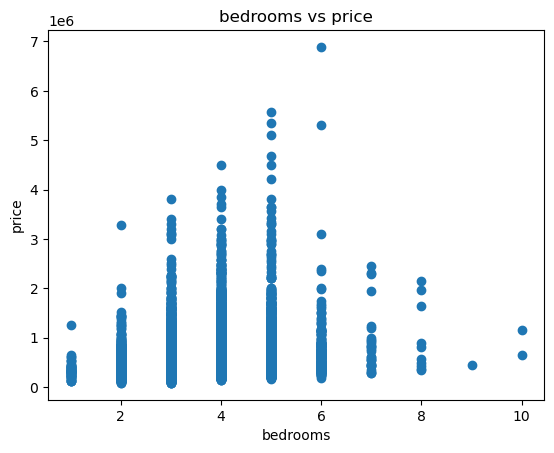

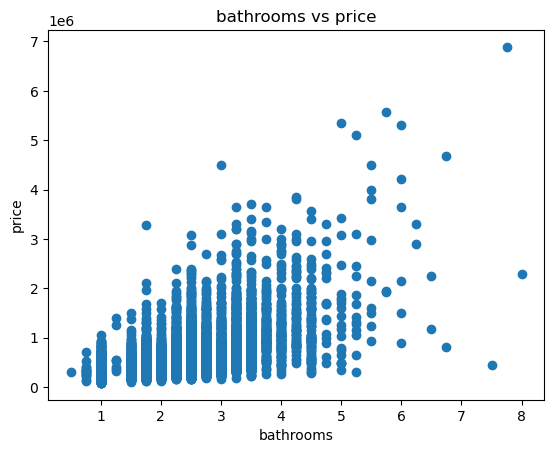

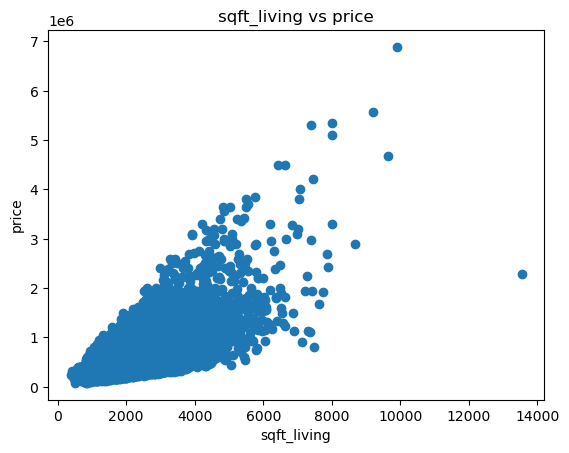

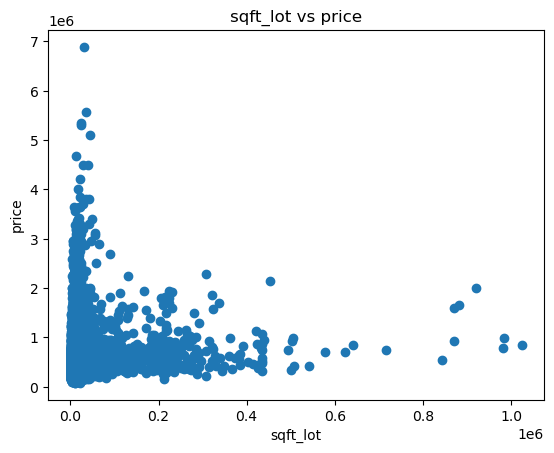

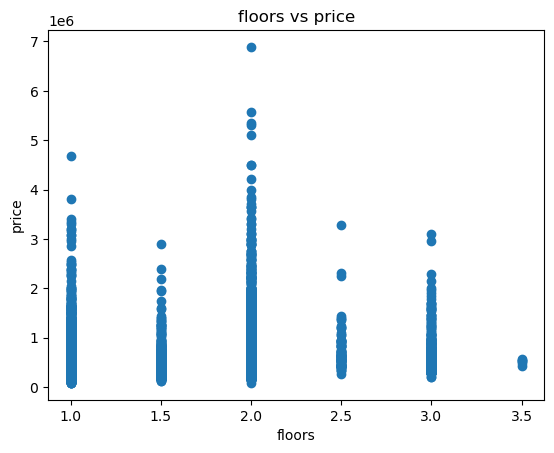

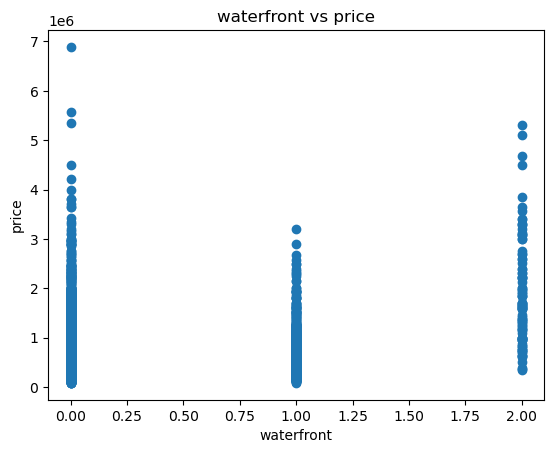

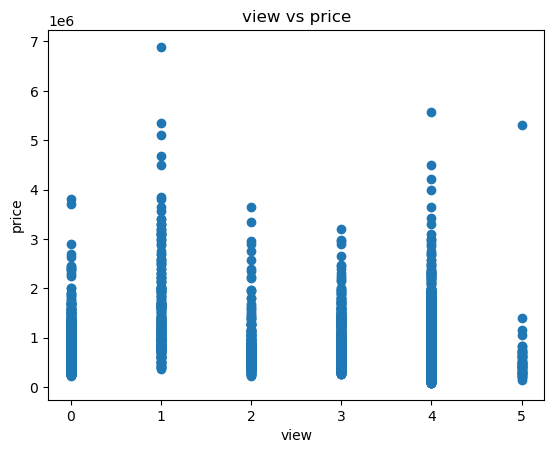

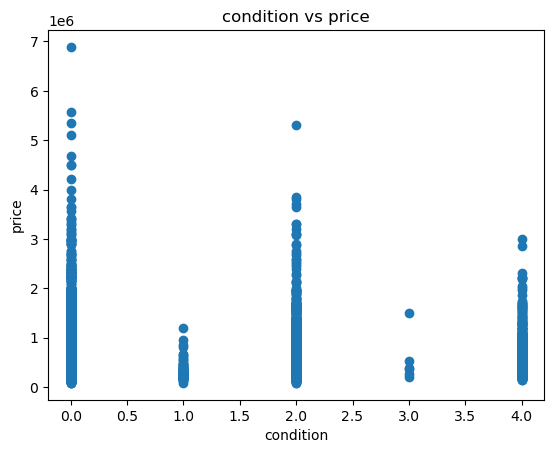

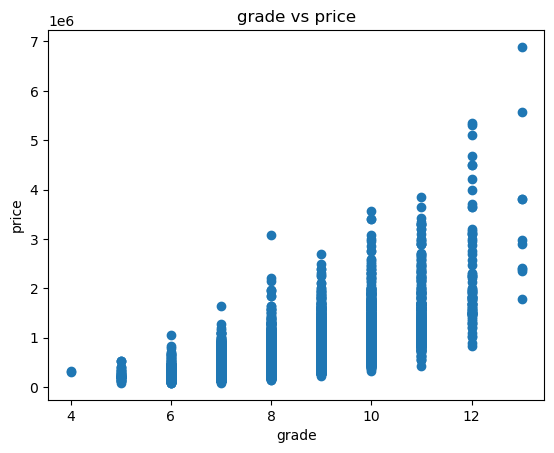

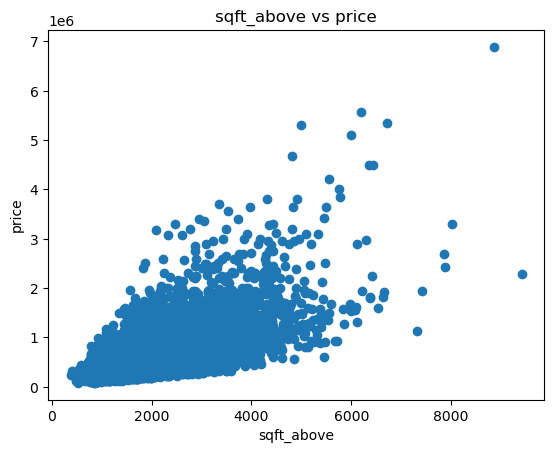

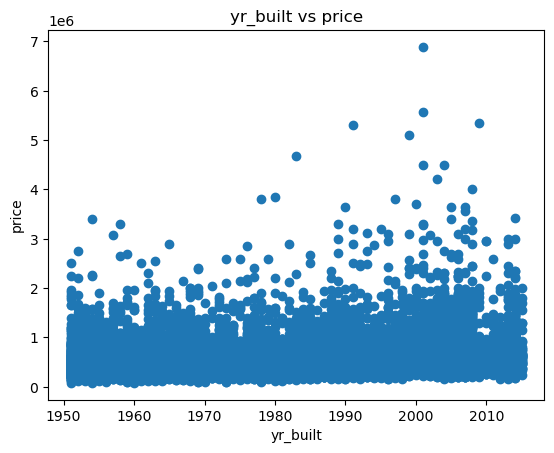

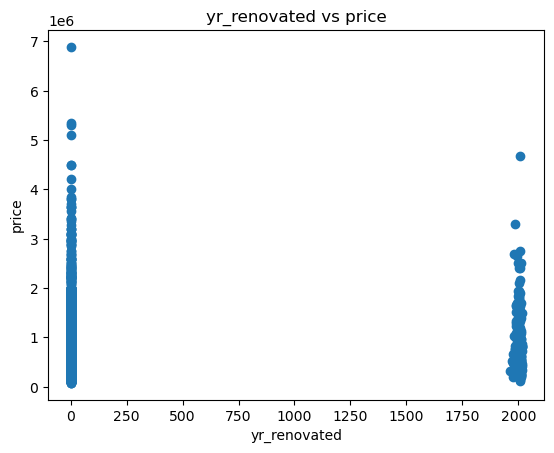

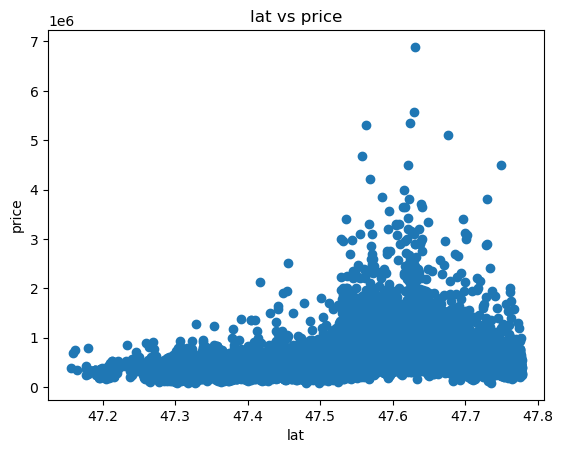

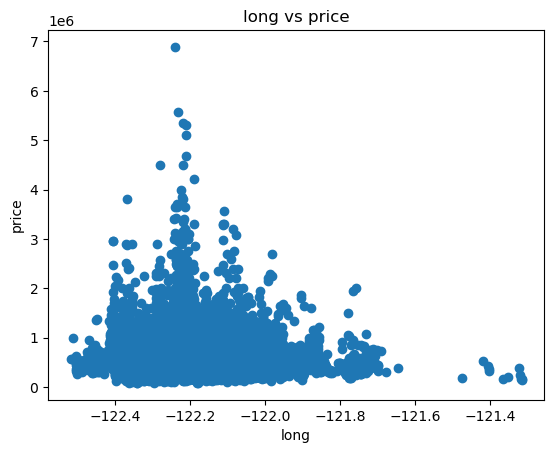

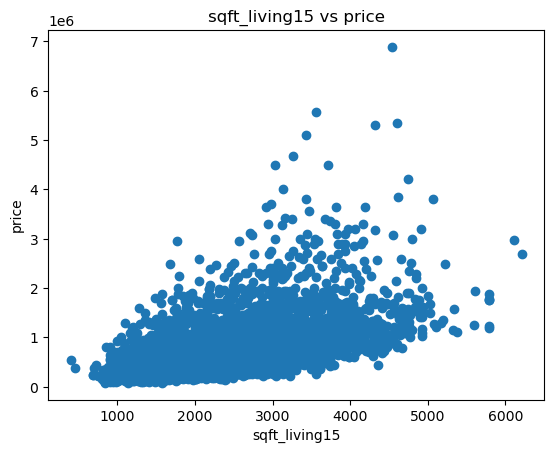

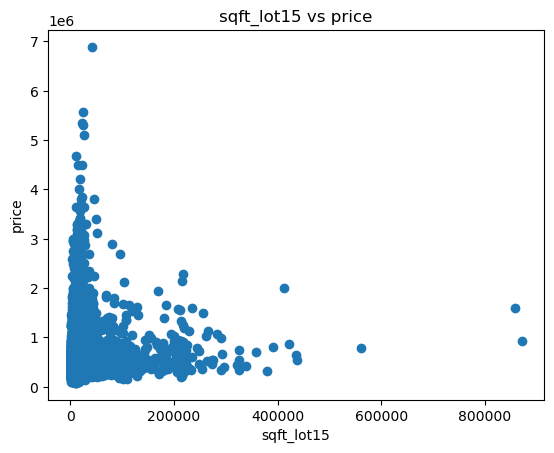

In [30]:
# Let's see how it looks visually
plt.figure()
for column in corr_matrix.columns[1:]:
    plt.scatter(x = data[column].astype(float), y = data["price"].astype(float), label = "f{column} vs price")
    plt.xlabel(column)
    plt.ylabel("price")
    plt.title(f"{column} vs price")
    plt.show()

According to the scatter plots: </br>
a. Square foot living has the highest correlation with the price </br>
b. Longitude has the lowest correlation with the price. </br>
c. View and condition have negative correlation with price, meaning, the more the feature the lower the price. </br>
d. Features with the highest correlation with price:

In [31]:
feat_with_hig_corr = corr_matrix["price"].abs().sort_values(ascending = False)
feat_with_hig_corr.head()

price            1.00
sqft_living      0.72
grade            0.70
sqft_above       0.62
sqft_living15    0.60
Name: price, dtype: float64

e. Features with the lowest correlation with price:

In [32]:
feat_with_low_corr = corr_matrix["price"].abs().sort_values(ascending = False)
feat_with_low_corr.tail()

waterfront      0.12
sqft_lot15      0.11
yr_renovated    0.11
long            0.06
condition       0.03
Name: price, dtype: float64

With this in mind, let's drop the less correlated columns with the price

In [33]:
columns_to_drop = feat_with_low_corr.tail()
data = data.drop(columns_to_drop.index, axis = 1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,4,7,1180,0.0,1955,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,4,7,2170,400.0,1951,47.7210,1690
3,604000.0,4,3.00,1960,5000,1.0,4,7,1050,910.0,1965,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,4,8,1680,0.0,1987,47.6168,1800
5,1230000.0,4,4.50,5420,101930,1.0,4,11,3890,1530.0,2001,47.6561,4760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,4,8,1530,0.0,2009,47.6993,1530
21593,400000.0,4,2.50,2310,5813,2.0,4,8,2310,0.0,2014,47.5107,1830
21594,402101.0,2,0.75,1020,1350,2.0,4,7,1020,0.0,2009,47.5944,1020
21595,400000.0,3,2.50,1600,2388,2.0,4,8,1600,0.0,2004,47.5345,1410


It's common sense that without the longitude, the latitude is useless since it's only one dimensional.

In [34]:
# Drop the latitude column
data = data.drop("lat", axis = 1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,4,7,1180,0.0,1955,1340
1,538000.0,3,2.25,2570,7242,2.0,4,7,2170,400.0,1951,1690
3,604000.0,4,3.00,1960,5000,1.0,4,7,1050,910.0,1965,1360
4,510000.0,3,2.00,1680,8080,1.0,4,8,1680,0.0,1987,1800
5,1230000.0,4,4.50,5420,101930,1.0,4,11,3890,1530.0,2001,4760
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,4,8,1530,0.0,2009,1530
21593,400000.0,4,2.50,2310,5813,2.0,4,8,2310,0.0,2014,1830
21594,402101.0,2,0.75,1020,1350,2.0,4,7,1020,0.0,2009,1020
21595,400000.0,3,2.50,1600,2388,2.0,4,8,1600,0.0,2004,1410


We will also drop view column because it negatively influences the price since it has a negative correlation

In [35]:
data = data.drop("view", axis = 1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0.0,1955,1340
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400.0,1951,1690
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910.0,1965,1360
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0.0,1987,1800
5,1230000.0,4,4.50,5420,101930,1.0,11,3890,1530.0,2001,4760
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8,1530,0.0,2009,1530
21593,400000.0,4,2.50,2310,5813,2.0,8,2310,0.0,2014,1830
21594,402101.0,2,0.75,1020,1350,2.0,7,1020,0.0,2009,1020
21595,400000.0,3,2.50,1600,2388,2.0,8,1600,0.0,2004,1410


## 4.8 Multicollinearity of features

We have to identify if there is a presence of strong strong correlation between the features.

In [36]:
# Convert price into a float
data["price"] = data["price"].astype(float)

# Using stack to have highly correlated values
data_col = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Zipping the variable names into a new column
data_col["muticollinearity_columns"] = list(zip(data_col.level_0, data_col.level_1))

# rename column 0
data_col.rename(columns={0: "renamed_column"}, inplace=True)

# set index to muticollinearity_columns
data_col.set_index(["muticollinearity_columns"], inplace=True)

# drop level columns
data_col.drop(columns=["level_1", "level_0"], inplace=True)

# drop duplicates
data_col = data_col[(data_col.renamed_column > 0.75) & (data_col.renamed_column < 1)]
data_col

,renamed_column
muticollinearity_columns,
"(sqft_above, sqft_living)",0.871439
"(sqft_living, sqft_above)",0.871439
"(sqft_living15, sqft_living)",0.765727
"(sqft_living, sqft_living15)",0.765727
"(sqft_living, grade)",0.753950
"(grade, sqft_living)",0.753950


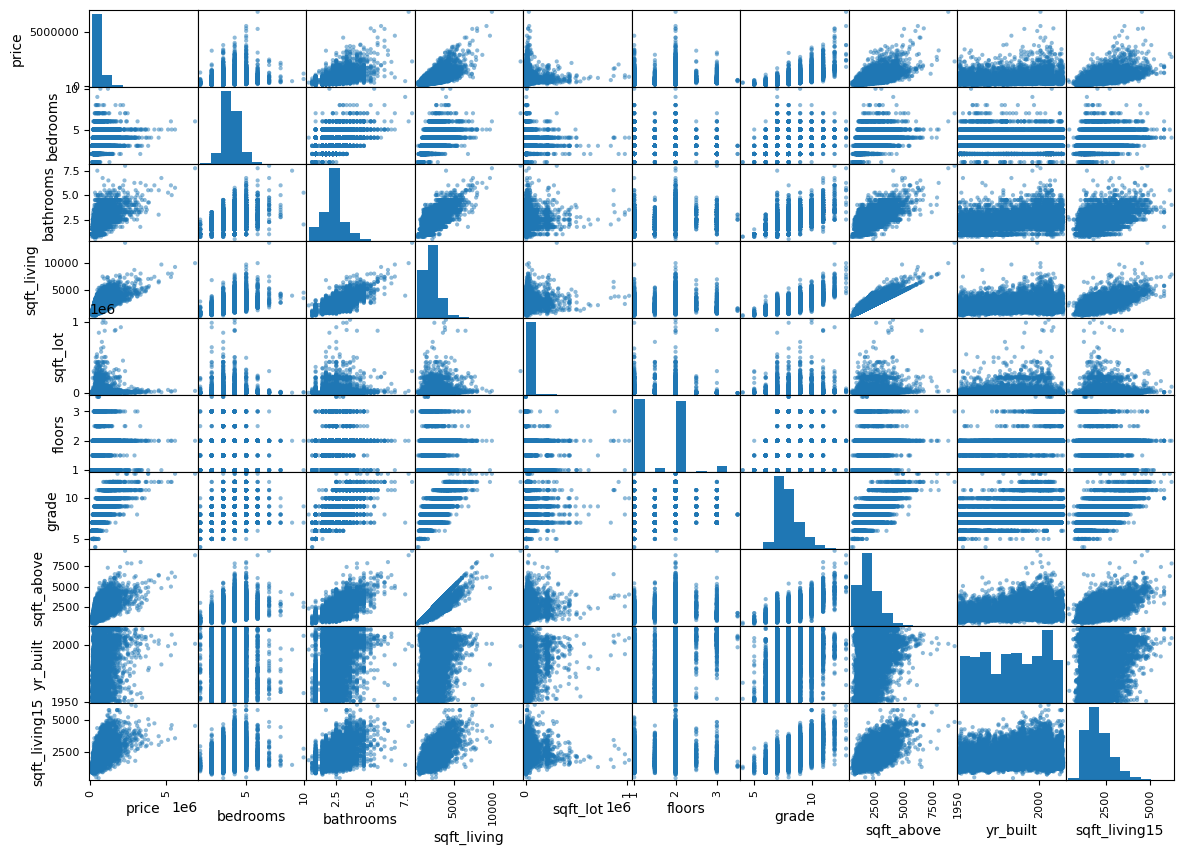

In [37]:
# We can further visualize this using a scatter matrix
pd.plotting.scatter_matrix(data, figsize = (14, 10))
plt.show()

According to the pairs and visuals we have above, we can drop some columns due to multicollinearity

In [38]:
drop_columns = data[["sqft_above", "sqft_living15"]]
data = data.drop(drop_columns, axis = 1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,7,0.0,1955
1,538000.0,3,2.25,2570,7242,2.0,7,400.0,1951
3,604000.0,4,3.00,1960,5000,1.0,7,910.0,1965
4,510000.0,3,2.00,1680,8080,1.0,8,0.0,1987
5,1230000.0,4,4.50,5420,101930,1.0,11,1530.0,2001
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8,0.0,2009
21593,400000.0,4,2.50,2310,5813,2.0,8,0.0,2014
21594,402101.0,2,0.75,1020,1350,2.0,7,0.0,2009
21595,400000.0,3,2.50,1600,2388,2.0,8,0.0,2004


In [39]:
# correlation
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built
price,1.000000,0.300832,0.551269,0.716297,0.122011,0.218454,0.704800,0.165607
bedrooms,0.300832,1.000000,0.476696,0.564110,0.021423,0.067131,0.297505,0.039027
bathrooms,0.551269,0.476696,1.000000,0.729079,0.090904,0.472532,0.627056,0.520728
sqft_living,0.716297,0.564110,0.729079,1.000000,0.197984,0.276256,0.753950,0.280794
sqft_lot,0.122011,0.021423,0.090904,0.197984,1.000000,-0.019611,0.135248,-0.002569
floors,0.218454,0.067131,0.472532,0.276256,-0.019611,1.000000,0.408830,0.704443
grade,0.704800,0.297505,0.627056,0.753950,0.135248,0.408830,1.000000,0.406652
yr_built,0.165607,0.039027,0.520728,0.280794,-0.002569,0.704443,0.406652,1.000000


sqft_basement and yr_built have very low correlations with the target variable i.e price

In [40]:
drop_columns = data[["sqft_basement", "yr_built"]]
data = data.drop(drop_columns, axis = 1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade
0,221900.0,3,1.00,1180,5650,1.0,7
1,538000.0,3,2.25,2570,7242,2.0,7
3,604000.0,4,3.00,1960,5000,1.0,7
4,510000.0,3,2.00,1680,8080,1.0,8
5,1230000.0,4,4.50,5420,101930,1.0,11
...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8
21593,400000.0,4,2.50,2310,5813,2.0,8
21594,402101.0,2,0.75,1020,1350,2.0,7
21595,400000.0,3,2.50,1600,2388,2.0,8


## 4.9 Log transorming and scaling

In [41]:
# Log transformation
data_transformed = np.log(data)

data_transformed = pd.DataFrame()
for column in data:
    data_transformed[column] = np.log(data[column])

print(data_transformed)

           price  bedrooms  bathrooms  sqft_living   sqft_lot    floors  \
0      12.309982  1.098612   0.000000     7.073270   8.639411  0.000000   
1      13.195614  1.098612   0.810930     7.851661   8.887653  0.693147   
3      13.311329  1.386294   1.098612     7.580700   8.517193  0.000000   
4      13.142166  1.098612   0.693147     7.426549   8.997147  0.000000   
5      14.022525  1.386294   1.504077     8.597851  11.532042  0.000000   
...          ...       ...        ...          ...        ...       ...   
21592  12.793859  1.098612   0.916291     7.333023   7.030857  1.098612   
21593  12.899220  1.386294   0.916291     7.745003   8.667852  0.693147   
21594  12.904459  0.693147  -0.287682     6.927558   7.207860  0.693147   
21595  12.899220  1.098612   0.916291     7.377759   7.778211  0.693147   
21596  12.691580  0.693147  -0.287682     6.927558   6.981006  0.693147   

          grade  
0      1.945910  
1      1.945910  
3      1.945910  
4      2.079442  
5      2.

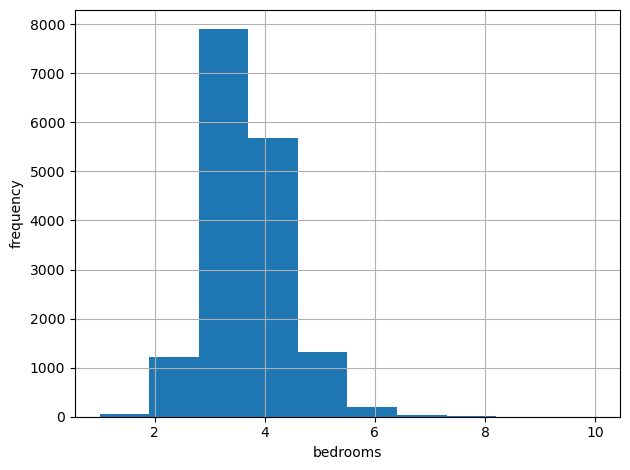

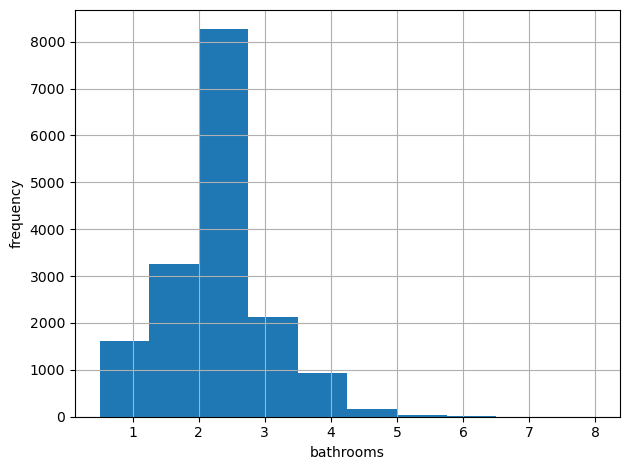

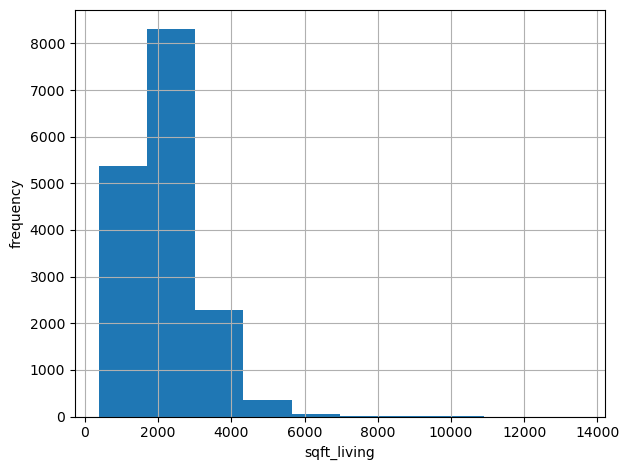

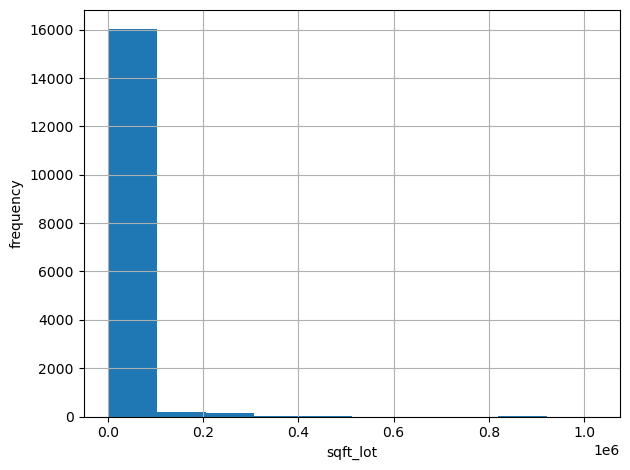

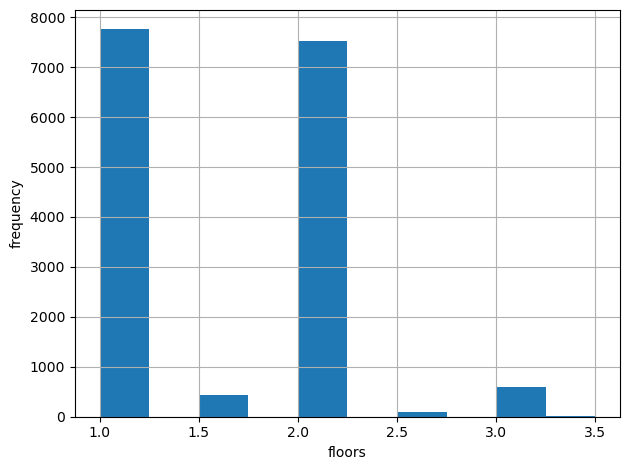

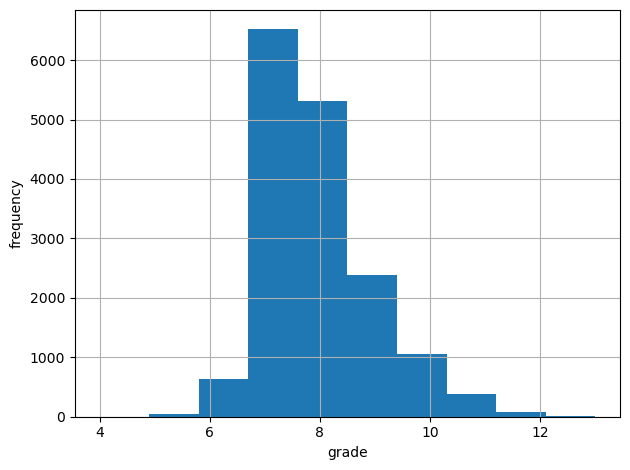

In [42]:
# Histograms to show normailty
columns_to_transform  = data.drop("price", axis = 1)
for column in columns_to_transform.columns:
    plt.hist(x = columns_to_transform[column])
    plt.ylabel("frequency")
    plt.xlabel(f"{column}")
    plt.tight_layout()
    plt.grid()
    plt.show()

Final data

In [43]:
# Scaling
data = data_transformed * 10
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade
0,123.099821,10.986123,0.000000,70.732697,86.394108,0.000000,19.459101
1,131.956138,10.986123,8.109302,78.516612,88.876527,6.931472,19.459101
3,133.113295,13.862944,10.986123,75.806998,85.171932,0.000000,19.459101
4,131.421660,10.986123,6.931472,74.265491,89.971472,0.000000,20.794415
5,140.225247,13.862944,15.040774,85.978511,115.320416,0.000000,23.978953
...,...,...,...,...,...,...,...
21592,127.938593,10.986123,9.162907,73.330230,70.308575,10.986123,20.794415
21593,128.992198,13.862944,9.162907,77.450028,86.678521,6.931472,20.794415
21594,129.044586,6.931472,-2.876821,69.275579,72.078599,6.931472,19.459101
21595,128.992198,10.986123,9.162907,73.777589,77.782115,6.931472,20.794415


# 5. Modelling

# 5.1 Simple-linear regression

Let's start with simple linear regression (Used as the baseline model) to see about one random feature with price

In [44]:
x = data["bedrooms"]
y = data["price"]
bedroom_model = sm.OLS(y, sm.add_constant(x)).fit()
bedroom_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1975.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:08:36   Log-Likelihood:                -49309.
No. Observations:               16413   AIC:                         9.862e+04
Df Residuals:                   16411   BIC:                         9.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.0664      0.194    630.783      0.000     121.687     122.446
bedrooms       0.6929      0.016     44.437      0.000       0.662       0.723
==============================================================================
Omnibus:                      697.580   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              839.244
Skew:                           0.476   Prob(JB):                    5.76e-183
Kurtosis:                       3.565   Cond. No.                         63.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model shows bedrooms are very core in determining the house prices. In fact, the increase of a bedroom (given that all other features are constant) means a 0.6929 increase in house price

## 5.2 Multi-linear regression

Now about how all the features(Multi-linear regression)

In [45]:
# Removing price since it's the target variable and bedrooms since we already used it for baseline modelling
x = data.drop(["price", "bedrooms"], axis = 1)
features_models = sm.OLS(y, sm.add_constant(x)).fit()
features_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5160.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:08:36   Log-Likelihood:                -42487.
No. Observations:               16413   AIC:                         8.499e+04
Df Residuals:                   16407   BIC:                         8.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.7890      0.661     87.468      0.000      56.494      59.084
bathrooms       0.0410      0.012      3.431      0.001       0.018       0.064
sqft_living     0.4743      0.012     39.068      0.000       0.450       0.498
sqft_lot       -0.0132      0.003     -4.110      0.000      -0.019      -0.007
floors         -0.0765      0.009     -8.687      0.000      -0.094      -0.059
grade           1.8358      0.028     64.873      0.000       1.780       1.891
==============================================================================
Omnibus:                      232.746   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.674
Skew:                           0.243   Prob(JB):                     7.50e-59
Kurtosis:                       3.393   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model shows that the features are highly statistically significant to the target variable i.e price. E.g aN f-statistic of 4354 

## 5.3 Testing for assumptions

### 5.3.1 Normality

First we test if it is normally distributed now that we transformed it with logarithm transformations

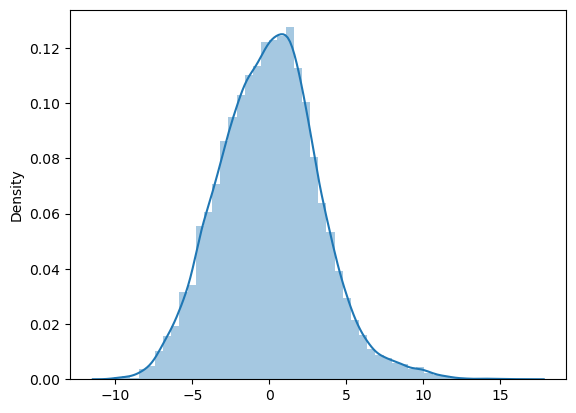

In [46]:
residuals = features_models.resid
sns.distplot(residuals)
plt.show()

### 5.3.3 Homoscedasticity

In [47]:
model = ols(formula = "price ~ sqft_living + sqft_lot + floors + bathrooms + bedrooms + grade", data = data).fit()

residuals = model.resid

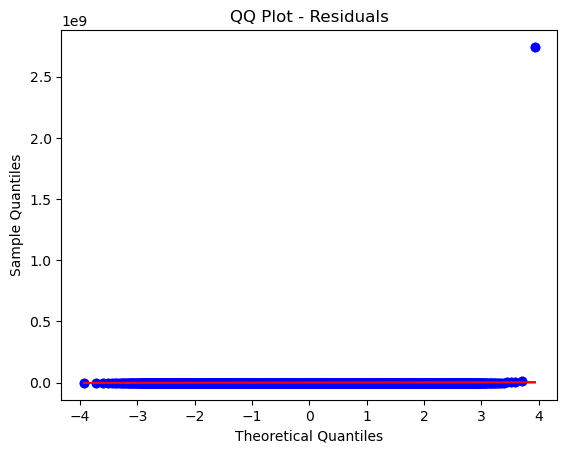

In [48]:
# Transform the data
residuals = np.reciprocal(residuals)
residuals = np.power(residuals, 2)

# generate QQ plot
stats.probplot(residuals, dist=stats.norm, plot=plt)

# reference line 
stats.probplot(residuals, dist=stats.norm, plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot - Residuals")
plt.show()

## 5.4 Recursive feature selection

In [49]:
x = data.drop("price", axis = 1)
y = data["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [50]:
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 3)
rfe.fit(x_train, y_train)
selected_features = x_train.columns[rfe.support_]

print("selected features:", selected_features)

selected features: Index(['bedrooms', 'sqft_living', 'grade'], dtype='object')


The fact that the selection discarded sqft_lot, floors and bathrooms just shows how the features above are so important in the determination of house prices

## 5.5 Regression model evaluation

In [51]:
def evaluate_regression_model(y_true, y_pred):
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    mse_rounded = round(mse, 4)
    
    # rsquared
    r2 = r2_score(y_true, y_pred)
    r2_rounded = round(r2, 4)
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    mae_rounded = round(mae, 4)
    
    y_pred = model.predict(x_test[selected_features])
    
    # Print the evaluation metrics
    print("Mean Squared Error (MSE):", mse_rounded)
    print("R-squared:", r2_rounded)
    print("Mean Absolute Error (MAE):", mae_rounded)

model.fit(x_train[selected_features], y_train)
y_pred = model.predict(x_test[selected_features])    
evaluate_regression_model(y_test, y_pred)

Mean Squared Error (MSE): 10.3957
R-squared: 0.6285
Mean Absolute Error (MAE): 2.5568


# 6. Interpretations

## 6.1 Simple linear regression

Adjusted rsquared of 0.107 means that the features can explain the houses prices by approximately 0.62 units.</br>
F-statistic: The higher the F-statistic the higher the relationship. In this case, 1975 means there is a strong relationship between the features and the prices.</br>
Coefficient of bedrooms is 0.6929 meaning for every increase in a bedroom, there is an increase of 0.06929 unit of the price.</br>

## 6.2 Multiple linear regression

We will use Adjusted Rsquared since it is better than Rsquared since it penalizing the inclusion of additional predictors that do not significantly contribute to the model.

Adjusted rsquared of 0.614 means that the features can explain the houses prices by approximately 0.62 units. The better since the more the figure is near one the better.</br>
F-statistic of 4354 means there is a strong relationship between the features and the prices. The model is wholly significant. </br>
coefficient of bathrooms is 0.0563 means that the addition of a single bathroom (while the other features are constant) will lead to the increase of price by 0.0563 unit.</br>
coefficient of sqft_living is 0.5434: Just like bathrooms, when there is an increase of one unit of sqft_luving, then there is an inrease of 0.5434 unit of the price. </br>
coefficient of grade is 1.7646 means one unit change for grade e.g good to better, will mean an increase of 1.7646 unit of the price. </br>

## 6.3 Recursive feature selection

Selected features are bedrooms, square foot living area and the grade. </br>
Since RFE usually take the most important features discarding the least important, this means that the number of bedrooms really affect customers choice and the price of the house as well. </br>
This is also true for square foot living and the grade. </br>
For grade, the design of the construction of the house really affects the price tag of a house. And of course, the more a house is well designed the higher it will cost. </br>
The living space of a house really matter too as it is one of the selected features which have a huge impact on the price

## 6.4 Regression model evaluation

Mean squared error of 10.3957 means that a the price for a given house may deviated by approximately 10 units from the actual price. </br>
Rsquared of 0.6285 means that the three featured features can explain the houses prices by approximately 0.62. The better since the more the figure is near one the better. </br>
Mean Absolute Error of 2.5568 means that the house price which are predicted deviate from the actual prices now known by 2.5568</br>

# 7. Recommendations and conclusions

Most features have been noted to have statistical significance on the price of the houses. In particular, these three features are very important and will play a very crucial role in the future in determining the price of the houses: </br>
Bedrooms <br>
Grade </br>
Living area </br>
Also, the stakeholders should keep a close eye on the: </br> bedroom </br> living area </br> grade </br>of a house while making kings county housing investments later on. </br>
</br>
a. The increase in the number of bathrooms means the increase in price of a house. </br>
b. The better the grade of the house i.e average > good > excellent better means the the more expensive a house will be. </br>
c.The more the bedrooms means the higher the price of a house becomes e.g a three bedroom house is more expensive than a two bedroom house. </br>
</br>
Finally, the assumptions being correct means the data provided above is reliable and can be used to predict future house prices. </br>
Normality: It means there no outliers in the data </br>
Homoscedasticity: It means the variables variability is equal across values of the features. </br>
But of course, things may change in the future so continously updating the model from time to time can be important too. </br>